## **Preposessing Dataset Training**

---



## Installing Package

In [112]:
!pip install sastrawi
!pip install emoji

## Import Library

In [113]:
import pandas as pd
import numpy
import collections
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from nltk import tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display, HTML

# Load Data Train

In [128]:
train_data = pd.concat([checking])

In [130]:
train_data.reset_index(inplace=True,drop=True)
train_data

,Unnamed: 0,label,tweet
0,1,Anger,"Hari ini sangat 😤! Bete banget sama kerjaan, deh!!! 😒😒😒 @username Harusnya bisa lebih baik, tapi malah makin ribet!"
1,2,Fear,"Yuhuuu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! Tolong dong, keburu deadline! http://example.com"
2,3,Sad,Gak nyangka! Ternyata si dia 💔 udah punya pacar lain. 😢😢 Kenapa nggak bilang dari awal? Padahal aku setia banget.
3,4,Joy,"Makan siang di kafe baru 🍔🍟, enak banget! Mau lagi kesana weekend ini. Siapa mau ikut? 🤩 #makan #enak"
4,5,Fear,"Kemarin habis nonton film horror yang serem banget 😱😱! Sampai nggak bisa tidur semalaman, kepikiran terus."
5,6,Love,"Baru aja ketemu temen lama di mall. Senangnyaaa! 😍💕 Banyak cerita yang harus diupdate, kangen banget! 12345"
6,7,Sad,Gimana sih bisa dapetin tiket konsernya? 😭😭 Udah coba berkali-kali tapi selalu sold out. Ada tips nggak?!!!!
7,8,Neutral,"Lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. Siapa suka kayak gini juga?"
8,9,Joy,"Belajar coding ternyata seru juga 💻! Awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project."
9,10,Neutral,Weekend ini mau staycation di villa. 🏡✨ Butuh banget refreshing dari rutinitas sehari-hari. Siapa ikut?


In [133]:
eda_data = train_data.copy()

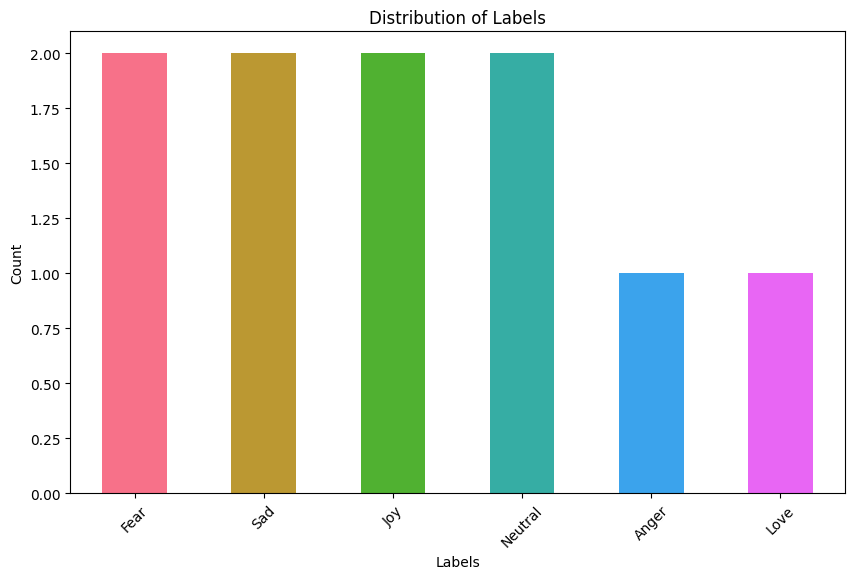

In [137]:
label_counts = eda_data["label"].value_counts()

# Generate a color palette with a unique color for each label
palette = sns.color_palette("husl", len(label_counts))

# Create a bar plot
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color=palette)
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Netral memiliki lebih banyak data dibandingkan label yang lain. 

## Data Distribution

In [138]:
eda_data['Length'] = eda_data['tweet'].str.len()
eda_data.head(10)

,Unnamed: 0,label,tweet,Length
0,1,Anger,"Hari ini sangat 😤! Bete banget sama kerjaan, deh!!! 😒😒😒 @username Harusnya bisa lebih baik, tapi malah makin ribet!",115
1,2,Fear,"Yuhuuu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! Tolong dong, keburu deadline! http://example.com",130
2,3,Sad,Gak nyangka! Ternyata si dia 💔 udah punya pacar lain. 😢😢 Kenapa nggak bilang dari awal? Padahal aku setia banget.,113
3,4,Joy,"Makan siang di kafe baru 🍔🍟, enak banget! Mau lagi kesana weekend ini. Siapa mau ikut? 🤩 #makan #enak",101
4,5,Fear,"Kemarin habis nonton film horror yang serem banget 😱😱! Sampai nggak bisa tidur semalaman, kepikiran terus.",106
5,6,Love,"Baru aja ketemu temen lama di mall. Senangnyaaa! 😍💕 Banyak cerita yang harus diupdate, kangen banget! 12345",107
6,7,Sad,Gimana sih bisa dapetin tiket konsernya? 😭😭 Udah coba berkali-kali tapi selalu sold out. Ada tips nggak?!!!!,108
7,8,Neutral,"Lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. Siapa suka kayak gini juga?",104
8,9,Joy,"Belajar coding ternyata seru juga 💻! Awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project.",108
9,10,Neutral,Weekend ini mau staycation di villa. 🏡✨ Butuh banget refreshing dari rutinitas sehari-hari. Siapa ikut?,103


In [139]:
print(f"Rata-rata panjang karakter tweet : {eda_data['Length'].mean():.2f}")

Rata-rata panjang karakter tweet : 109.50


In [140]:
print(f"Jumlah panjang karakter tweet  : {eda_data['Length'].sum():.2f}")

Jumlah panjang karakter tweet  : 1095.00


In [141]:
def word_count(tweet):
    tweet_list = tweet.split()
    return len(tweet_list)

In [142]:
eda_data['Word_count'] = eda_data['tweet'].apply(word_count)
eda_data.head(10)

,Unnamed: 0,label,tweet,Length,Word_count
0,1,Anger,"Hari ini sangat 😤! Bete banget sama kerjaan, deh!!! 😒😒😒 @username Harusnya bisa lebih baik, tapi malah makin ribet!",115,19
1,2,Fear,"Yuhuuu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! Tolong dong, keburu deadline! http://example.com",130,17
2,3,Sad,Gak nyangka! Ternyata si dia 💔 udah punya pacar lain. 😢😢 Kenapa nggak bilang dari awal? Padahal aku setia banget.,113,20
3,4,Joy,"Makan siang di kafe baru 🍔🍟, enak banget! Mau lagi kesana weekend ini. Siapa mau ikut? 🤩 #makan #enak",101,19
4,5,Fear,"Kemarin habis nonton film horror yang serem banget 😱😱! Sampai nggak bisa tidur semalaman, kepikiran terus.",106,16
5,6,Love,"Baru aja ketemu temen lama di mall. Senangnyaaa! 😍💕 Banyak cerita yang harus diupdate, kangen banget! 12345",107,17
6,7,Sad,Gimana sih bisa dapetin tiket konsernya? 😭😭 Udah coba berkali-kali tapi selalu sold out. Ada tips nggak?!!!!,108,17
7,8,Neutral,"Lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. Siapa suka kayak gini juga?",104,18
8,9,Joy,"Belajar coding ternyata seru juga 💻! Awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project.",108,17
9,10,Neutral,Weekend ini mau staycation di villa. 🏡✨ Butuh banget refreshing dari rutinitas sehari-hari. Siapa ikut?,103,15


In [143]:
print(f"Jumlah kata : {eda_data['Word_count'].sum():.2f}")

Jumlah kata : 175.00


In [144]:
print(f"Rata-rata jumlah kata : {eda_data['Word_count'].mean():.2f}")

Rata-rata jumlah kata : 17.50


In [145]:
eda_data['mean_word_length'] = eda_data['tweet'].map(lambda rev: numpy.mean([len(word) for word in rev.split()]))
eda_data.head(10)

,Unnamed: 0,label,tweet,Length,Word_count,mean_word_length
0,1,Anger,"Hari ini sangat 😤! Bete banget sama kerjaan, deh!!! 😒😒😒 @username Harusnya bisa lebih baik, tapi malah makin ribet!",115,19,5.105263
1,2,Fear,"Yuhuuu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! Tolong dong, keburu deadline! http://example.com",130,17,6.705882
2,3,Sad,Gak nyangka! Ternyata si dia 💔 udah punya pacar lain. 😢😢 Kenapa nggak bilang dari awal? Padahal aku setia banget.,113,20,4.700000
3,4,Joy,"Makan siang di kafe baru 🍔🍟, enak banget! Mau lagi kesana weekend ini. Siapa mau ikut? 🤩 #makan #enak",101,19,4.368421
4,5,Fear,"Kemarin habis nonton film horror yang serem banget 😱😱! Sampai nggak bisa tidur semalaman, kepikiran terus.",106,16,5.687500
5,6,Love,"Baru aja ketemu temen lama di mall. Senangnyaaa! 😍💕 Banyak cerita yang harus diupdate, kangen banget! 12345",107,17,5.352941
6,7,Sad,Gimana sih bisa dapetin tiket konsernya? 😭😭 Udah coba berkali-kali tapi selalu sold out. Ada tips nggak?!!!!,108,17,5.411765
7,8,Neutral,"Lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. Siapa suka kayak gini juga?",104,18,4.833333
8,9,Joy,"Belajar coding ternyata seru juga 💻! Awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project.",108,17,5.411765
9,10,Neutral,Weekend ini mau staycation di villa. 🏡✨ Butuh banget refreshing dari rutinitas sehari-hari. Siapa ikut?,103,15,5.933333


In [146]:
eda_data['mean_sent_length'] = eda_data['tweet'].map(lambda rev: numpy.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
eda_data.head(10)

,Unnamed: 0,label,tweet,Length,Word_count,mean_word_length,mean_sent_length
0,1,Anger,"Hari ini sangat 😤! Bete banget sama kerjaan, deh!!! 😒😒😒 @username Harusnya bisa lebih baik, tapi malah makin ribet!",115,19,5.105263,37.666667
1,2,Fear,"Yuhuuu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! Tolong dong, keburu deadline! http://example.com",130,17,6.705882,31.750000
2,3,Sad,Gak nyangka! Ternyata si dia 💔 udah punya pacar lain. 😢😢 Kenapa nggak bilang dari awal? Padahal aku setia banget.,113,20,4.700000,27.500000
3,4,Joy,"Makan siang di kafe baru 🍔🍟, enak banget! Mau lagi kesana weekend ini. Siapa mau ikut? 🤩 #makan #enak",101,19,4.368421,24.500000
4,5,Fear,"Kemarin habis nonton film horror yang serem banget 😱😱! Sampai nggak bisa tidur semalaman, kepikiran terus.",106,16,5.687500,52.500000
5,6,Love,"Baru aja ketemu temen lama di mall. Senangnyaaa! 😍💕 Banyak cerita yang harus diupdate, kangen banget! 12345",107,17,5.352941,26.000000
6,7,Sad,Gimana sih bisa dapetin tiket konsernya? 😭😭 Udah coba berkali-kali tapi selalu sold out. Ada tips nggak?!!!!,108,17,5.411765,26.500000
7,8,Neutral,"Lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. Siapa suka kayak gini juga?",104,18,4.833333,51.500000
8,9,Joy,"Belajar coding ternyata seru juga 💻! Awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project.",108,17,5.411765,53.500000
9,10,Neutral,Weekend ini mau staycation di villa. 🏡✨ Butuh banget refreshing dari rutinitas sehari-hari. Siapa ikut?,103,15,5.933333,33.666667


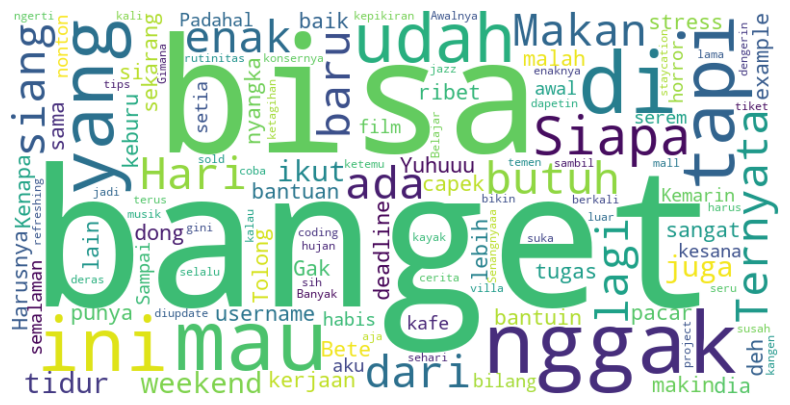

In [147]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua teks dalam satu string
all_tweets = ' '.join(eda_data['tweet'])

# Membuat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Menampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Preprocessing

In [148]:
import copy

train_data_copy = copy.deepcopy(train_data)


## 01. Case Folding

### a. Lowercase

In [149]:
def tweet_lowercase(tweet):
    tweet = tweet.lower()
    return tweet

In [150]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_lowercase)

CPU times: total: 0 ns
Wall time: 1 ms


In [151]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"Hari ini sangat 😤! Bete banget sama kerjaan, deh!!! 😒😒😒 @username Harusnya bisa lebih baik, tapi malah makin ribet!","hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 @username harusnya bisa lebih baik, tapi malah makin ribet!"
1,"Yuhuuu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! Tolong dong, keburu deadline! http://example.com","yuhuuu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! tolong dong, keburu deadline! http://example.com"
2,Gak nyangka! Ternyata si dia 💔 udah punya pacar lain. 😢😢 Kenapa nggak bilang dari awal? Padahal aku setia banget.,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.
3,"Makan siang di kafe baru 🍔🍟, enak banget! Mau lagi kesana weekend ini. Siapa mau ikut? 🤩 #makan #enak","makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩 #makan #enak"
4,"Kemarin habis nonton film horror yang serem banget 😱😱! Sampai nggak bisa tidur semalaman, kepikiran terus.","kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus."
5,"Baru aja ketemu temen lama di mall. Senangnyaaa! 😍💕 Banyak cerita yang harus diupdate, kangen banget! 12345","baru aja ketemu temen lama di mall. senangnyaaa! 😍💕 banyak cerita yang harus diupdate, kangen banget! 12345"
6,Gimana sih bisa dapetin tiket konsernya? 😭😭 Udah coba berkali-kali tapi selalu sold out. Ada tips nggak?!!!!,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!
7,"Lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. Siapa suka kayak gini juga?","lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?"
8,"Belajar coding ternyata seru juga 💻! Awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project.","belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project."
9,Weekend ini mau staycation di villa. 🏡✨ Butuh banget refreshing dari rutinitas sehari-hari. Siapa ikut?,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?


In [152]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_lowercase)

CPU times: total: 0 ns
Wall time: 995 µs


## 02. Cleansing

### a. Menghapus username

In [153]:
import re

In [154]:
def tweet_delete_username(tweet):

    userPattern = r'@\w+'
    

    tweet = re.sub(userPattern, '', tweet)
    
    return tweet


In [155]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_username)

CPU times: total: 0 ns
Wall time: 1 ms


In [156]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 @username harusnya bisa lebih baik, tapi malah makin ribet!","hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 harusnya bisa lebih baik, tapi malah makin ribet!"
1,"yuhuuu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! tolong dong, keburu deadline! http://example.com","yuhuuu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! tolong dong, keburu deadline! http://example.com"
2,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.
3,"makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩 #makan #enak","makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩 #makan #enak"
4,"kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus.","kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus."
5,"baru aja ketemu temen lama di mall. senangnyaaa! 😍💕 banyak cerita yang harus diupdate, kangen banget! 12345","baru aja ketemu temen lama di mall. senangnyaaa! 😍💕 banyak cerita yang harus diupdate, kangen banget! 12345"
6,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!
7,"lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?","lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?"
8,"belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project.","belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project."
9,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?


In [157]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_username)

CPU times: total: 0 ns
Wall time: 1.01 ms


### b. Menghapus url

In [158]:
def tweet_delete_url(tweet):
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*|url)" #Pola ngehapus url
    tweet = re.sub(urlPattern, '', tweet)
    return tweet

In [159]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_url)

CPU times: total: 0 ns
Wall time: 995 µs


In [160]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 harusnya bisa lebih baik, tapi malah makin ribet!","hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 harusnya bisa lebih baik, tapi malah makin ribet!"
1,"yuhuuu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! tolong dong, keburu deadline! http://example.com","yuhuuu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! tolong dong, keburu deadline!"
2,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.
3,"makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩 #makan #enak","makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩 #makan #enak"
4,"kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus.","kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus."
5,"baru aja ketemu temen lama di mall. senangnyaaa! 😍💕 banyak cerita yang harus diupdate, kangen banget! 12345","baru aja ketemu temen lama di mall. senangnyaaa! 😍💕 banyak cerita yang harus diupdate, kangen banget! 12345"
6,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!
7,"lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?","lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?"
8,"belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project.","belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project."
9,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?


In [161]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_url)

CPU times: total: 0 ns
Wall time: 980 µs


### c. Menghapus kelebihan huruf

In [162]:
def tweet_delete_extra_letters(tweet):
    sequencePattern   = r'([A-Za-z])\1{2,}' 
    seqReplacePattern = r'\1' #Pola ngereplace yang kelebihan huruf tiga kali
    tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
    
    return tweet

In [163]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_extra_letters)

CPU times: total: 0 ns
Wall time: 956 µs


In [164]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 harusnya bisa lebih baik, tapi malah makin ribet!","hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 harusnya bisa lebih baik, tapi malah makin ribet!"
1,"yuhuuu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! tolong dong, keburu deadline!","yuhu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! tolong dong, keburu deadline!"
2,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.
3,"makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩 #makan #enak","makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩 #makan #enak"
4,"kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus.","kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus."
5,"baru aja ketemu temen lama di mall. senangnyaaa! 😍💕 banyak cerita yang harus diupdate, kangen banget! 12345","baru aja ketemu temen lama di mall. senangnya! 😍💕 banyak cerita yang harus diupdate, kangen banget! 12345"
6,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!
7,"lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?","lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?"
8,"belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project.","belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project."
9,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?


In [165]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_extra_letters)

CPU times: total: 0 ns
Wall time: 1.35 ms


### d. Menghapus new line dan new text

In [166]:
def tweet_delete_new_line_new_text(tweet):
    tweet = re.sub(r'\\[nt]', ' ', tweet)
    return tweet

In [167]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_new_line_new_text)

CPU times: total: 15.6 ms
Wall time: 1 ms


In [168]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 harusnya bisa lebih baik, tapi malah makin ribet!","hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 harusnya bisa lebih baik, tapi malah makin ribet!"
1,"yuhu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! tolong dong, keburu deadline!","yuhu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! tolong dong, keburu deadline!"
2,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.
3,"makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩 #makan #enak","makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩 #makan #enak"
4,"kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus.","kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus."
5,"baru aja ketemu temen lama di mall. senangnya! 😍💕 banyak cerita yang harus diupdate, kangen banget! 12345","baru aja ketemu temen lama di mall. senangnya! 😍💕 banyak cerita yang harus diupdate, kangen banget! 12345"
6,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!
7,"lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?","lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?"
8,"belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project.","belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project."
9,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?


In [169]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_new_line_new_text)

CPU times: total: 0 ns
Wall time: 1.31 ms


### e. Menghapus Hastag

In [170]:
def tweet_remove_hashtags(tweet):
    hashtag= r'#\w+'
    tweet = re.sub(hashtag, '', tweet)
    return tweet

In [171]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_remove_hashtags)

CPU times: total: 0 ns
Wall time: 1 ms


In [172]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

pd.options.display.max_colwidth = 150

display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 harusnya bisa lebih baik, tapi malah makin ribet!","hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 harusnya bisa lebih baik, tapi malah makin ribet!"
1,"yuhu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! tolong dong, keburu deadline!","yuhu~ ada yang bisa bantuin tugas nggak? butuh bantuan sekarang! tolong dong, keburu deadline!"
2,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.
3,"makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩 #makan #enak","makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩"
4,"kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus.","kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus."
5,"baru aja ketemu temen lama di mall. senangnya! 😍💕 banyak cerita yang harus diupdate, kangen banget! 12345","baru aja ketemu temen lama di mall. senangnya! 😍💕 banyak cerita yang harus diupdate, kangen banget! 12345"
6,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!
7,"lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?","lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?"
8,"belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project.","belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project."
9,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?


In [173]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_remove_hashtags)

CPU times: total: 0 ns
Wall time: 1.08 ms


### f. Menghapus angka

In [174]:
def tweet_delete_number(tweet):
    number = r'\d+' 
    tweet = re.sub(number, '', tweet)
    return tweet

In [175]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_number)

CPU times: total: 0 ns
Wall time: 996 µs


In [176]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 harusnya bisa lebih baik, tapi malah makin ribet!","hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 harusnya bisa lebih baik, tapi malah makin ribet!"
1,"yuhu~ ada yang bisa bantuin tugas nggak? butuh bantuan sekarang! tolong dong, keburu deadline!","yuhu~ ada yang bisa bantuin tugas nggak? butuh bantuan sekarang! tolong dong, keburu deadline!"
2,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.
3,"makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩","makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩"
4,"kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus.","kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus."
5,"baru aja ketemu temen lama di mall. senangnya! 😍💕 banyak cerita yang harus diupdate, kangen banget! 12345","baru aja ketemu temen lama di mall. senangnya! 😍💕 banyak cerita yang harus diupdate, kangen banget!"
6,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!
7,"lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?","lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?"
8,"belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project.","belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project."
9,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?


In [177]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_number)

CPU times: total: 0 ns
Wall time: 1 ms


### g. Menghapus tanda baca

In [178]:
def tweet_delete_punctuation(tweet):
    punctuationPattern = r'[^\w\s]' 
    tweet = re.sub(punctuationPattern, ' ', tweet)
    
    return tweet

In [179]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_punctuation)

CPU times: total: 0 ns
Wall time: 1.01 ms


In [180]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 harusnya bisa lebih baik, tapi malah makin ribet!",hari ini sangat bete banget sama kerjaan deh harusnya bisa lebih baik tapi malah makin ribet
1,"yuhu~ ada yang bisa bantuin tugas nggak? butuh bantuan sekarang! tolong dong, keburu deadline!",yuhu ada yang bisa bantuin tugas nggak butuh bantuan sekarang tolong dong keburu deadline
2,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.,gak nyangka ternyata si dia udah punya pacar lain kenapa nggak bilang dari awal padahal aku setia banget
3,"makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩",makan siang di kafe baru enak banget mau lagi kesana weekend ini siapa mau ikut
4,"kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus.",kemarin habis nonton film horror yang serem banget sampai nggak bisa tidur semalaman kepikiran terus
5,"baru aja ketemu temen lama di mall. senangnya! 😍💕 banyak cerita yang harus diupdate, kangen banget!",baru aja ketemu temen lama di mall senangnya banyak cerita yang harus diupdate kangen banget
6,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!,gimana sih bisa dapetin tiket konsernya udah coba berkali kali tapi selalu sold out ada tips nggak
7,"lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?",lagi hujan deras di luar enaknya tidur siang sambil dengerin musik jazz siapa suka kayak gini juga
8,"belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project.",belajar coding ternyata seru juga awalnya susah tapi kalau udah ngerti jadi ketagihan mau bikin project
9,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?,weekend ini mau staycation di villa butuh banget refreshing dari rutinitas sehari hari siapa ikut


In [181]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_punctuation)

CPU times: total: 0 ns
Wall time: 994 µs


### h. Menghapus Extra Spasi

In [182]:
def tweet_delete_extra_space(tweet):
    tweet = re.sub(r"\s+", " ", tweet)
    tweet = re.sub(r"^\s+|\s+$", "", tweet)
    
    return tweet

In [183]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_extra_space)

CPU times: total: 0 ns
Wall time: 986 µs


In [184]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,hari ini sangat bete banget sama kerjaan deh harusnya bisa lebih baik tapi malah makin ribet,hari ini sangat bete banget sama kerjaan deh harusnya bisa lebih baik tapi malah makin ribet
1,yuhu ada yang bisa bantuin tugas nggak butuh bantuan sekarang tolong dong keburu deadline,yuhu ada yang bisa bantuin tugas nggak butuh bantuan sekarang tolong dong keburu deadline
2,gak nyangka ternyata si dia udah punya pacar lain kenapa nggak bilang dari awal padahal aku setia banget,gak nyangka ternyata si dia udah punya pacar lain kenapa nggak bilang dari awal padahal aku setia banget
3,makan siang di kafe baru enak banget mau lagi kesana weekend ini siapa mau ikut,makan siang di kafe baru enak banget mau lagi kesana weekend ini siapa mau ikut
4,kemarin habis nonton film horror yang serem banget sampai nggak bisa tidur semalaman kepikiran terus,kemarin habis nonton film horror yang serem banget sampai nggak bisa tidur semalaman kepikiran terus
5,baru aja ketemu temen lama di mall senangnya banyak cerita yang harus diupdate kangen banget,baru aja ketemu temen lama di mall senangnya banyak cerita yang harus diupdate kangen banget
6,gimana sih bisa dapetin tiket konsernya udah coba berkali kali tapi selalu sold out ada tips nggak,gimana sih bisa dapetin tiket konsernya udah coba berkali kali tapi selalu sold out ada tips nggak
7,lagi hujan deras di luar enaknya tidur siang sambil dengerin musik jazz siapa suka kayak gini juga,lagi hujan deras di luar enaknya tidur siang sambil dengerin musik jazz siapa suka kayak gini juga
8,belajar coding ternyata seru juga awalnya susah tapi kalau udah ngerti jadi ketagihan mau bikin project,belajar coding ternyata seru juga awalnya susah tapi kalau udah ngerti jadi ketagihan mau bikin project
9,weekend ini mau staycation di villa butuh banget refreshing dari rutinitas sehari hari siapa ikut,weekend ini mau staycation di villa butuh banget refreshing dari rutinitas sehari hari siapa ikut


In [185]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_extra_space)

CPU times: total: 0 ns
Wall time: 1.01 ms


## 03. Normalization

### Import Kamus

In [186]:
kamus_singkatan = pd.read_csv("../Dataset/kamus_singkatan2.csv",delimiter=",")
kamus_singkatan

,Unnamed: 0.1,Unnamed: 0,singkatan,kata asal
0,0,NaN,aamiin,amin
1,1,NaN,adek,adik
2,2,NaN,adlh,adalah
3,3,NaN,ad,ada
4,4,NaN,aer,air
...,...,...,...,...
1373,1572,NaN,elu,kamu
1374,1573,NaN,lo,kamu
1375,1574,NaN,lu,kamu
1376,1575,NaN,anjim,anjing


In [187]:
def create_kamus():
      kamus = {}
      for i in range(len(kamus_singkatan)):
          kamus[kamus_singkatan["singkatan"][i]]=kamus_singkatan["kata asal"][i].lower().strip()
      return kamus

In [188]:
kamus = create_kamus()
kamus

{'aamiin': 'amin',
 'adek': 'adik',
 'adlh': 'adalah',
 'ad': 'ada',
 'aer': 'air',
 'aiskrim': 'es krim',
 'aj': 'saja',
 'aja': 'saja',
 'ajah': 'saja',
 'ajalah': 'saja',
 'aje': 'saja',
 'ajh': 'saja',
 'ajj': 'saja',
 'aku': 'saya',
 'ak': 'saya',
 'akoh': 'saya',
 'akutu': 'saya',
 'aq': 'saya',
 'alesan': 'alasan',
 'ama': 'sama',
 'amaca': 'ah masa',
 'amuh': 'kamu',
 'ancur': 'hancur',
 'ane': 'saya',
 'anget': 'hangat',
 'anjeng': 'anjing',
 'ank': 'anak',
 'apah': 'apa',
 'aph': 'apa',
 'apo': 'apa',
 'apose': 'apa',
 'apz': 'apa',
 'artine': 'artinya',
 'asek': 'asik',
 'ati2': 'hati-hati',
 'atit': 'sakit',
 'atu': 'satu',
 'atw': 'atau',
 'ayang': 'sayang',
 'ayuk': 'ayo',
 'babang': 'abang',
 'bae': 'baik',
 'bais': 'habis',
 'bakalan': 'akan',
 'bales': 'balas',
 'bandingin': 'bandingkan',
 'banget': 'sekali',
 'bangett': 'sangat',
 'banyakin': 'perbanyak',
 'barengan': 'bersamaan',
 'baryaw': 'sabar ya',
 'baso': 'bakso',
 'bay': 'selamat tinggal',
 'bbrp': 'beberapa',

In [189]:
def tweet_replace_contractions(tweet):
    pattern = re.compile(r'\b(' + '|'.join(re.escape(contraction) for contraction in kamus.keys()) + r')\b')
    tweet = pattern.sub(lambda x: kamus[x.group()], tweet)
    return tweet

In [190]:
%%time
for i in range(len(train_data)):
    print(f"Baris ke-{i}")
    kalimat = train_data["tweet"][i]
    kalimat = tweet_replace_contractions(kalimat)
    train_data.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
Baris ke-6
Baris ke-7
Baris ke-8
Baris ke-9
CPU times: total: 0 ns
Wall time: 31.1 ms


In [191]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(200).to_html()))

,Before,After
0,hari ini sangat bete banget sama kerjaan deh harusnya bisa lebih baik tapi malah makin ribet,hari ini sangat sebal sekali sama kerjaan deh harusnya bisa lebih baik tapi malah makin ribet
1,yuhu ada yang bisa bantuin tugas nggak butuh bantuan sekarang tolong dong keburu deadline,yuhu ada yang bisa bantuin tugas tidak butuh bantuan sekarang tolong dong keburu deadline
2,gak nyangka ternyata si dia udah punya pacar lain kenapa nggak bilang dari awal padahal aku setia banget,tidak sangka ternyata si dia sudah punya pacar lain kenapa tidak bilang dari awal padahal saya setia sekali
3,makan siang di kafe baru enak banget mau lagi kesana weekend ini siapa mau ikut,makan siang di kafe baru enak sekali mau lagi kesana weekend ini siapa mau ikuti
4,kemarin habis nonton film horror yang serem banget sampai nggak bisa tidur semalaman kepikiran terus,kemarin habis nonton film horror yang seram sekali sampai tidak bisa tidur semalaman kepikiran terus
5,baru aja ketemu temen lama di mall senangnya banyak cerita yang harus diupdate kangen banget,baru saja ketemu teman lama di mall senangnya banyak cerita yang harus diupdate kangen sekali
6,gimana sih bisa dapetin tiket konsernya udah coba berkali kali tapi selalu sold out ada tips nggak,gimana sih bisa mendapatkan tiket konsernya sudah coba berkali kali tapi selalu sold out ada tips tidak
7,lagi hujan deras di luar enaknya tidur siang sambil dengerin musik jazz siapa suka kayak gini juga,lagi hujan deras di luar enaknya tidur siang sambil dengerin musik jazz siapa suka mirip gini juga
8,belajar coding ternyata seru juga awalnya susah tapi kalau udah ngerti jadi ketagihan mau bikin project,belajar coding ternyata seru juga awalnya susah tapi kalau sudah ngerti jadi ketagihan mau bikin project
9,weekend ini mau staycation di villa butuh banget refreshing dari rutinitas sehari hari siapa ikut,weekend ini mau staycation di villa butuh sekali refreshing dari rutinitas sehari hari siapa ikuti


In [192]:
%%time
for i in range(len(train_data_copy)):
    print(f"Baris ke-{i}")
    kalimat = train_data_copy["tweet"][i]
    kalimat = tweet_replace_contractions(kalimat)
    train_data_copy.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
Baris ke-6
Baris ke-7
Baris ke-8
Baris ke-9
CPU times: total: 15.6 ms
Wall time: 23.8 ms


## 04. Stopword Removal

Library : Sastrawi

In [193]:
def tweet_stopwords_removal(tweet):
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    tweet = stopword.remove(tweet)
    return tweet

In [194]:
%%time
for i in range(len(train_data)):
    print(f"Baris ke-{i}")
    kalimat = train_data["tweet"][i]
    kalimat = tweet_stopwords_removal(kalimat)
    train_data.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
Baris ke-6
Baris ke-7
Baris ke-8
Baris ke-9
CPU times: total: 0 ns
Wall time: 7.17 ms


In [195]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,hari ini sangat sebal sekali sama kerjaan deh harusnya bisa lebih baik tapi malah makin ribet,hari sangat sebal sekali sama kerjaan deh harusnya lebih baik malah makin ribet
1,yuhu ada yang bisa bantuin tugas tidak butuh bantuan sekarang tolong dong keburu deadline,yuhu yang bantuin tugas butuh bantuan sekarang dong keburu deadline
2,tidak sangka ternyata si dia sudah punya pacar lain kenapa tidak bilang dari awal padahal saya setia sekali,sangka ternyata si sudah punya pacar kenapa bilang awal padahal setia sekali
3,makan siang di kafe baru enak sekali mau lagi kesana weekend ini siapa mau ikuti,makan siang kafe baru enak sekali mau kesana weekend siapa mau ikuti
4,kemarin habis nonton film horror yang seram sekali sampai tidak bisa tidur semalaman kepikiran terus,kemarin habis nonton film horror seram sekali tidak tidur semalaman kepikiran terus
5,baru saja ketemu teman lama di mall senangnya banyak cerita yang harus diupdate kangen sekali,baru ketemu teman lama mall senangnya banyak cerita harus diupdate kangen sekali
6,gimana sih bisa mendapatkan tiket konsernya sudah coba berkali kali tapi selalu sold out ada tips tidak,gimana sih mendapatkan tiket konsernya coba berkali kali selalu sold out tips
7,lagi hujan deras di luar enaknya tidur siang sambil dengerin musik jazz siapa suka mirip gini juga,hujan deras luar enaknya tidur siang dengerin musik jazz siapa suka mirip gini
8,belajar coding ternyata seru juga awalnya susah tapi kalau sudah ngerti jadi ketagihan mau bikin project,belajar coding ternyata seru awalnya susah kalau ngerti jadi ketagihan mau bikin project
9,weekend ini mau staycation di villa butuh sekali refreshing dari rutinitas sehari hari siapa ikuti,weekend mau staycation villa butuh sekali refreshing rutinitas sehari hari siapa ikuti


In [196]:
%%time
for i in range(len(train_data_copy)):
    print(f"Baris ke-{i}")
    kalimat = train_data_copy["tweet"][i]
    kalimat = tweet_stopwords_removal(kalimat)
    train_data_copy.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
Baris ke-6
Baris ke-7
Baris ke-8
Baris ke-9
CPU times: total: 0 ns
Wall time: 7.07 ms


## 05. Stemming

Library Satrawi

In [197]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()


In [198]:
def stemming_sentences(tweet):
    stemmer = factory.create_stemmer()

    if isinstance(tweet, list):
        return [stemmer.stem(i) for i in tweet]
    else:
        return stemmer.stem(tweet)


In [199]:
%%time
for i in range(len(train_data)):
    print(f"Baris ke-{i}")
    kalimat = train_data["tweet"][i]
    kalimat = stemming_sentences(kalimat)
    train_data.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
Baris ke-6
Baris ke-7
Baris ke-8
Baris ke-9
CPU times: total: 6.27 s
Wall time: 11.7 s


In [200]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,hari sangat sebal sekali sama kerjaan deh harusnya lebih baik malah makin ribet,hari sangat sebal sekali sama kerja deh harus lebih baik malah makin ribet
1,yuhu yang bantuin tugas butuh bantuan sekarang dong keburu deadline,yuhu yang bantuin tugas butuh bantu sekarang dong keburu deadline
2,sangka ternyata si sudah punya pacar kenapa bilang awal padahal setia sekali,sangka nyata si sudah punya pacar kenapa bilang awal padahal setia sekali
3,makan siang kafe baru enak sekali mau kesana weekend siapa mau ikuti,makan siang kafe baru enak sekali mau kesana weekend siapa mau ikut
4,kemarin habis nonton film horror seram sekali tidak tidur semalaman kepikiran terus,kemarin habis nonton film horror seram sekali tidak tidur malam pikir terus
5,baru ketemu teman lama mall senangnya banyak cerita harus diupdate kangen sekali,baru ketemu teman lama mall senang banyak cerita harus diupdate kangen sekali
6,gimana sih mendapatkan tiket konsernya coba berkali kali selalu sold out tips,gimana sih dapat tiket konser coba kali kali selalu sold out tips
7,hujan deras luar enaknya tidur siang dengerin musik jazz siapa suka mirip gini,hujan deras luar enak tidur siang dengerin musik jazz siapa suka mirip gin
8,belajar coding ternyata seru awalnya susah kalau ngerti jadi ketagihan mau bikin project,ajar coding nyata seru awal susah kalau ngerti jadi tagih mau bikin project
9,weekend mau staycation villa butuh sekali refreshing rutinitas sehari hari siapa ikuti,weekend mau staycation villa butuh sekali refreshing rutinitas hari hari siapa ikut


In [201]:
%%time
for i in range(len(train_data_copy)):
    print(f"Baris ke-{i}")
    kalimat = train_data_copy["tweet"][i]
    kalimat = stemming_sentences(kalimat)
    train_data_copy.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
Baris ke-6
Baris ke-7
Baris ke-8
Baris ke-9
CPU times: total: 6.42 s
Wall time: 8.1 s


## 06. Tokenization

In [202]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TEMP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [203]:
def tokenization_sentences(tweet):
    if isinstance(tweet, list):
        tokenized_tweet = []
        for word in tweet:
            tokens = word_tokenize(word)
            tokenized_tweet.extend(tokens)
        return tokenized_tweet
    else:
        return word_tokenize(tweet)

In [204]:
%%time
for i in range(len(train_data)):
    print(f"Baris ke-{i}")
    kalimat = train_data["tweet"][i]
    kalimat = tokenization_sentences(kalimat)
    train_data.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
Baris ke-6
Baris ke-7
Baris ke-8
Baris ke-9
CPU times: total: 0 ns
Wall time: 2.7 ms


In [205]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,hari sangat sebal sekali sama kerja deh harus lebih baik malah makin ribet,"[hari, sangat, sebal, sekali, sama, kerja, deh, harus, lebih, baik, malah, makin, ribet]"
1,yuhu yang bantuin tugas butuh bantu sekarang dong keburu deadline,"[yuhu, yang, bantuin, tugas, butuh, bantu, sekarang, dong, keburu, deadline]"
2,sangka nyata si sudah punya pacar kenapa bilang awal padahal setia sekali,"[sangka, nyata, si, sudah, punya, pacar, kenapa, bilang, awal, padahal, setia, sekali]"
3,makan siang kafe baru enak sekali mau kesana weekend siapa mau ikut,"[makan, siang, kafe, baru, enak, sekali, mau, kesana, weekend, siapa, mau, ikut]"
4,kemarin habis nonton film horror seram sekali tidak tidur malam pikir terus,"[kemarin, habis, nonton, film, horror, seram, sekali, tidak, tidur, malam, pikir, terus]"
5,baru ketemu teman lama mall senang banyak cerita harus diupdate kangen sekali,"[baru, ketemu, teman, lama, mall, senang, banyak, cerita, harus, diupdate, kangen, sekali]"
6,gimana sih dapat tiket konser coba kali kali selalu sold out tips,"[gimana, sih, dapat, tiket, konser, coba, kali, kali, selalu, sold, out, tips]"
7,hujan deras luar enak tidur siang dengerin musik jazz siapa suka mirip gin,"[hujan, deras, luar, enak, tidur, siang, dengerin, musik, jazz, siapa, suka, mirip, gin]"
8,ajar coding nyata seru awal susah kalau ngerti jadi tagih mau bikin project,"[ajar, coding, nyata, seru, awal, susah, kalau, ngerti, jadi, tagih, mau, bikin, project]"
9,weekend mau staycation villa butuh sekali refreshing rutinitas hari hari siapa ikut,"[weekend, mau, staycation, villa, butuh, sekali, refreshing, rutinitas, hari, hari, siapa, ikut]"


In [206]:
%%time
for i in range(len(train_data_copy)):
    print(f"Baris ke-{i}")
    kalimat = train_data_copy["tweet"][i]
    kalimat = tokenization_sentences(kalimat)
    train_data_copy.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
Baris ke-6
Baris ke-7
Baris ke-8
Baris ke-9
CPU times: total: 0 ns
Wall time: 3.01 ms


## 07. Padding

Maksimalnya adalah 64

In [207]:
def pad_sentence(tweet, max_length=64, pad_token=''):
    if len(tweet) < max_length:
        tweet += [pad_token] * (max_length - len(tweet))
    else:
        tweet = tweet[:max_length]
    return tweet

In [208]:
%%time
for i in range(len(train_data)):
    print(f"Baris ke-{i}")
    kalimat = train_data["tweet"][i]
    kalimat = pad_sentence(kalimat)
    train_data.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
Baris ke-6
Baris ke-7
Baris ke-8
Baris ke-9
CPU times: total: 0 ns
Wall time: 2.01 ms


In [209]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"[hari, sangat, sebal, sekali, sama, kerja, deh, harus, lebih, baik, malah, makin, ribet]","[hari, sangat, sebal, sekali, sama, kerja, deh, harus, lebih, baik, malah, makin, ribet, , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ]"
1,"[yuhu, yang, bantuin, tugas, butuh, bantu, sekarang, dong, keburu, deadline]","[yuhu, yang, bantuin, tugas, butuh, bantu, sekarang, dong, keburu, deadline, , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ]"
2,"[sangka, nyata, si, sudah, punya, pacar, kenapa, bilang, awal, padahal, setia, sekali]","[sangka, nyata, si, sudah, punya, pacar, kenapa, bilang, awal, padahal, setia, sekali, , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ]"
3,"[makan, siang, kafe, baru, enak, sekali, mau, kesana, weekend, siapa, mau, ikut]","[makan, siang, kafe, baru, enak, sekali, mau, kesana, weekend, siapa, mau, ikut, , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ]"
4,"[kemarin, habis, nonton, film, horror, seram, sekali, tidak, tidur, malam, pikir, terus]","[kemarin, habis, nonton, film, horror, seram, sekali, tidak, tidur, malam, pikir, terus, , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ]"
5,"[baru, ketemu, teman, lama, mall, senang, banyak, cerita, harus, diupdate, kangen, sekali]","[baru, ketemu, teman, lama, mall, senang, banyak, cerita, harus, diupdate, kangen, sekali, , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ]"
6,"[gimana, sih, dapat, tiket, konser, coba, kali, kali, selalu, sold, out, tips]","[gimana, sih, dapat, tiket, konser, coba, kali, kali, selalu, sold, out, tips, , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ]"
7,"[hujan, deras, luar, enak, tidur, siang, dengerin, musik, jazz, siapa, suka, mirip, gin]","[hujan, deras, luar, enak, tidur, siang, dengerin, musik, jazz, siapa, suka, mirip, gin, , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ]"
8,"[ajar, coding, nyata, seru, awal, susah, kalau, ngerti, jadi, tagih, mau, bikin, project]","[ajar, coding, nyata, seru, awal, susah, kalau, ngerti, jadi, tagih, mau, bikin, project, , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ]"
9,"[weekend, mau, staycation, villa, butuh, sekali, refreshing, rutinitas, hari, hari, siapa, ikut]","[weekend, mau, staycation, villa, butuh, sekali, refreshing, rutinitas, hari, hari, siapa, ikut, , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ]"


# Saving Preposessing

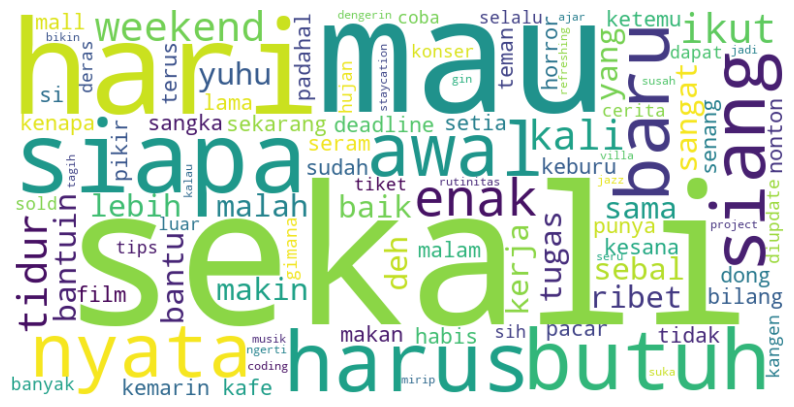

In [210]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called train_data with a column "tweet"
# containing the tweets

# Convert lists of tweets into a single string
all_tweets = ' '.join([tweet for sublist in train_data['tweet'] for tweet in sublist])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [211]:
comparison_df = pd.DataFrame({
    'Before ': eda_data['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"Hari ini sangat 😤! Bete banget sama kerjaan, deh!!! 😒😒😒 @username Harusnya bisa lebih baik, tapi malah makin ribet!","[hari, sangat, sebal, sekali, sama, kerja, deh, harus, lebih, baik, malah, makin, ribet, , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ]"
1,"Yuhuuu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! Tolong dong, keburu deadline! http://example.com","[yuhu, yang, bantuin, tugas, butuh, bantu, sekarang, dong, keburu, deadline, , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ]"
2,Gak nyangka! Ternyata si dia 💔 udah punya pacar lain. 😢😢 Kenapa nggak bilang dari awal? Padahal aku setia banget.,"[sangka, nyata, si, sudah, punya, pacar, kenapa, bilang, awal, padahal, setia, sekali, , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ]"
3,"Makan siang di kafe baru 🍔🍟, enak banget! Mau lagi kesana weekend ini. Siapa mau ikut? 🤩 #makan #enak","[makan, siang, kafe, baru, enak, sekali, mau, kesana, weekend, siapa, mau, ikut, , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ]"
4,"Kemarin habis nonton film horror yang serem banget 😱😱! Sampai nggak bisa tidur semalaman, kepikiran terus.","[kemarin, habis, nonton, film, horror, seram, sekali, tidak, tidur, malam, pikir, terus, , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ]"
5,"Baru aja ketemu temen lama di mall. Senangnyaaa! 😍💕 Banyak cerita yang harus diupdate, kangen banget! 12345","[baru, ketemu, teman, lama, mall, senang, banyak, cerita, harus, diupdate, kangen, sekali, , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ]"
6,Gimana sih bisa dapetin tiket konsernya? 😭😭 Udah coba berkali-kali tapi selalu sold out. Ada tips nggak?!!!!,"[gimana, sih, dapat, tiket, konser, coba, kali, kali, selalu, sold, out, tips, , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ]"
7,"Lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. Siapa suka kayak gini juga?","[hujan, deras, luar, enak, tidur, siang, dengerin, musik, jazz, siapa, suka, mirip, gin, , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ]"
8,"Belajar coding ternyata seru juga 💻! Awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project.","[ajar, coding, nyata, seru, awal, susah, kalau, ngerti, jadi, tagih, mau, bikin, project, , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ]"
9,Weekend ini mau staycation di villa. 🏡✨ Butuh banget refreshing dari rutinitas sehari-hari. Siapa ikut?,"[weekend, mau, staycation, villa, butuh, sekali, refreshing, rutinitas, hari, hari, siapa, ikut, , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ]"


In [212]:
train_data.to_csv("../Dataset/Training/Clean_train_data_fullLimit(check).csv")